In [1]:
import numpy as np
import pandas as pd

import string
import re

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 

import gc
gc.enable()

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
path = '/data/examples/ibmxfet/'

file_dir = os.listdir(path)
profile = pd.read_csv(path+file_dir[0])

In [25]:
import pickle
with open('usage_sum', 'rb') as file:
    usage_sum = pickle.load(file)

In [29]:
usage_sum['MO_CALL_DUR']

0        2412
1         741
2         393
3        3207
4         769
5         656
6         230
7         583
8        1417
9         126
10        378
11          0
12        149
13        492
14        264
15       1939
16       1015
17          0
18        925
19          0
20        454
21       3311
22       3983
23          0
24       2220
25        336
26       1056
27       1490
28       2228
29        143
        ...  
2598      732
2599      988
2600      452
2601      641
2602      483
2603      112
2604       80
2605      563
2606      113
2607      347
2608     5198
2609      914
2610      719
2611     2249
2612        0
2613      401
2614      141
2615      156
2616      479
2617     5990
2618    29315
2619     8131
2620      322
2621      239
2622      387
2623      378
2624      286
2625      374
2626     1583
2627     9392
Name: MO_CALL_DUR, dtype: int64

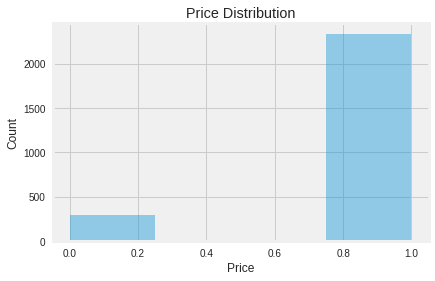

In [180]:
sns.distplot(usage_sum['DATA_USG_MB']<24000, bins=4, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

/Users/Joel/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


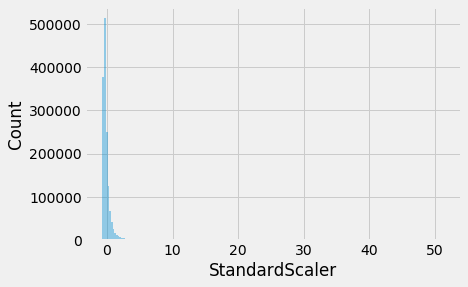

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
s_price = scaler.fit_transform(train['price'].reshape(-1, 1))
sns.distplot(s_price, bins=200, kde=False)
plt.xlabel('StandardScaler')
plt.ylabel('Count')
plt.show()
del s_price

/Users/Joel/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


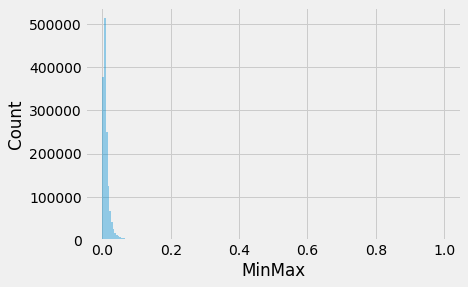

In [12]:
minmax = MinMaxScaler()
mm_price = minmax.fit_transform(train['price'].reshape(-1, 1))
sns.distplot(mm_price, bins=200, kde=False)
plt.xlabel('MinMax')
plt.ylabel('Count')
plt.show()
del mm_price

In [86]:
train.price.describe() # train.price等同 train['price']

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

#### Note:
- 最小值出現「**零**」元，

- 看看零元是什麼東西

In [8]:
# Train
df1 = (train.set_index('brand_name').groupby(level=0)['item_condition_id'].agg({'count'})).reset_index()
df1.sort_values(by=['count'],inplace=True, ascending=False)
df1.head(10)


,brand_name,count
3221,PINK,54088
3057,Nike,54043
4504,Victoria's Secret,48036
2604,LuLaRoe,31024
267,Apple,17322
1510,FOREVER 21,15186
3067,Nintendo,15007
2626,Lululemon,14558
2841,Michael Kors,13928
213,American Eagle,13254
